In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from ast import literal_eval

In [79]:
def read_text(file_name):
	data = pd.read_csv(file_name,delimiter=',', encoding="utf-8-sig")
	return data

In [3]:
# read repo data
repo_df = read_text("repo_data.csv")
repo_df.shape

(2034, 12)

In [4]:
repo_df.columns

Index(['repo', 'author', 'parent', 'created_date', 'last_updated_date',
       'contributors_list', 'watchers_list', 'forkers_list', 'stargazers_list',
       'assignees_list', 'pull_commenter', 'issuers_list'],
      dtype='object')

In [5]:
repos_list = repo_df['repo']
authors_list = repo_df['author']
created_date_list = repo_df['created_date']
last_updated_date_list = repo_df['last_updated_date']

In [6]:
import datetime as dt
def get_datetime(date):
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    hour = int(date[11:13])
    mint = int(date[14:16])
    secd = int(date[17:])
    
    return dt.datetime(year, month, day, hour, mint, secd)

get_datetime(last_updated_date_list[0])

datetime.datetime(2019, 7, 28, 15, 3, 28)

In [7]:
repo_created_date_map = {}
for i in range(len(repos_list)):
    date = get_datetime(created_date_list[i])
    repo_created_date_map[repos_list[i]] = date
repo_update_date_map = {}
for i in range(len(repos_list)):
    date = get_datetime(last_updated_date_list[i])
    repo_update_date_map[repos_list[i]] = date
repo_life_map = {}
for repo in repos_list:
    repo_life_map[repo] = repo_update_date_map[repo] - repo_created_date_map[repo]
repo_life_map

{'benhe119/MAD-Spy': datetime.timedelta(seconds=3),
 'ItsYoungDaddy/Resilience-Client-Source': datetime.timedelta(seconds=2),
 'Xelentra1/android-overlay-malware-example': datetime.timedelta(seconds=2),
 'captainmephisto/Worm': datetime.timedelta(seconds=2398),
 'urantialife/sAINT': datetime.timedelta(days=2, seconds=63693),
 'thelazyone11/IsTheApp': datetime.timedelta(days=286, seconds=78700),
 'Tigerly/Detection-of-Android-Malware-based-on-Signature-and-Permission-Analysis': datetime.timedelta(seconds=3),
 'FihlaTV/Java-Port-Knocking-Backdoor': datetime.timedelta(seconds=5),
 'root1135/sAINT': datetime.timedelta(seconds=4),
 'falash143/AdoBot': datetime.timedelta(days=13, seconds=77686),
 'KevinSantos/Z0lvers-botnet': datetime.timedelta(seconds=2),
 'reduardo7/intellij-decrypt': datetime.timedelta(seconds=2),
 'VictorAlessander/SpyGen': datetime.timedelta(seconds=2),
 'Disane/android-overlay-malware-example': datetime.timedelta(seconds=1),
 'fengjixuchui/Malware-Writeups-1': datetime

In [8]:
parent_list = repo_df['parent']
parent_list.isnull().sum()

428

In [9]:
def get_contributors_list(contributors_list, parent_list):
    contributors_list = get_list(contributors_list)
    for i in range(len(contributors_list)):
        parent = parent_list[i]
        if parent in contributors_list[i]:
            contributors_list[i].remove(parent)
    return contributors_list

In [10]:
contributors_list = repo_df['contributors_list']
#contributors_list.isnull().sum()
#get_list(contributors_list)
contributors_list = get_contributors_list(contributors_list, parent_list)
#contributors_list

In [17]:
watchers_list = repo_df['watchers_list'].apply(literal_eval)

In [18]:
forkers_list = repo_df['forkers_list'].apply(literal_eval)

In [19]:
stargazers_list = repo_df['stargazers_list'].apply(literal_eval)

In [20]:
assigness_list = repo_df['assignees_list'].apply(literal_eval)
#assigness_list

In [21]:
pull_commenters_list = repo_df['pull_commenter'].apply(literal_eval)
for commenters in pull_commenters_list:
    if len(commenters) != 0:
        print(commenters)

['riking']


In [22]:
issuers_list = repo_df['issuers_list'].apply(literal_eval)
#issuers_list

# basic statistics

In [23]:
def get_count_map(alist_of_list):
    count_map = {}
    for alist in alist_of_list:
        if len(alist) in count_map:
            count_map[len(alist)] += 1
        else:
            count_map[len(alist)] = 1
    count_map = {k: v for k, v in sorted(count_map.items(), key=lambda item: item[0])}
    return count_map

In [24]:
contributors_count_map = get_count_map(contributors_list)
#contributors_count_map
watchers_count_map = get_count_map(watchers_list)
#watchers_count_map
forkers_count_map = get_count_map(forkers_list)
#forkers_count_map
stargazers_count_map = get_count_map(stargazers_list)
#stargazers_count_map
assigness_count_map = get_count_map(assigness_list)
#assigness_count_map
pull_commenters_count_map = get_count_map(pull_commenters_list)
#pull_commenters_count_map
issuers_count_map = get_count_map(issuers_list)
issuers_count_map

{0: 1998, 1: 17, 2: 9, 4: 3, 6: 1, 8: 1, 11: 1, 16: 1, 27: 1, 30: 1, 70: 1}

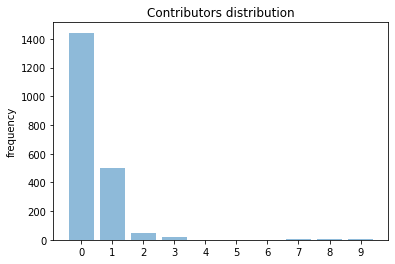

In [25]:
import numpy as np
def plot_barchart(count_map, title):
    xval = []
    yval = []
    for key, val in count_map.items():
        xval.append(key)
        yval.append(val)
    y_pos = np.arange(len(xval))
    plt.bar(y_pos, yval, align='center', alpha=0.5)
    plt.xticks(y_pos, xval)
    plt.ylabel('frequency')
    plt.title(title)

plot_barchart(contributors_count_map, "Contributors distribution")
    

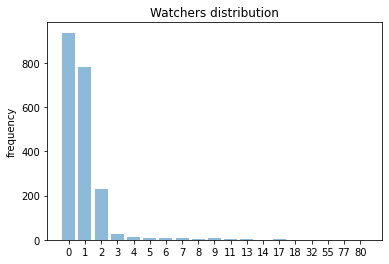

In [26]:
plot_barchart(watchers_count_map, "Watchers distribution")

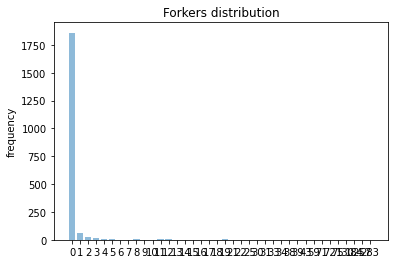

In [27]:
plot_barchart(forkers_count_map, "Forkers distribution")

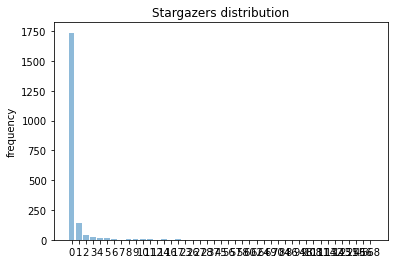

In [28]:
plot_barchart(stargazers_count_map, "Stargazers distribution")

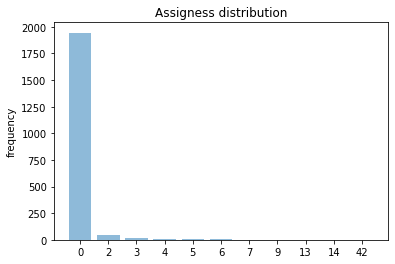

In [29]:
plot_barchart(assigness_count_map, "Assigness distribution")

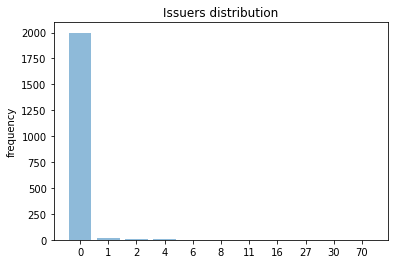

In [30]:
plot_barchart(issuers_count_map, "Issuers distribution")

# remove benign things from the dataset

In [31]:
def remove_benign_authors(alist_of_list, malware_authors):
    new_list = []
    for alist in alist_of_list:
        temp = []
        for val in alist:
            if val in malware_authors:
                temp.append(val)
        new_list.append(temp)
    return new_list


In [32]:
contributors_list2 = remove_benign_authors(contributors_list, list(authors_list))
watchers_list2 = remove_benign_authors(watchers_list, list(authors_list))
forkers_list2 = remove_benign_authors(forkers_list, list(authors_list))
stargazers_list2 = remove_benign_authors(stargazers_list, list(authors_list))
assigness_list2 = remove_benign_authors(assigness_list, list(authors_list))
pull_commenters_list2 = remove_benign_authors(pull_commenters_list, list(authors_list))
issuers_list2 = remove_benign_authors(issuers_list, list(authors_list))

In [33]:
contributors_count_map2 = get_count_map(contributors_list2)
#contributors_count_map
watchers_count_map2 = get_count_map(watchers_list2)
#watchers_count_map
forkers_count_map2 = get_count_map(forkers_list2)
#forkers_count_map
stargazers_count_map2 = get_count_map(stargazers_list2)
#stargazers_count_map
assigness_count_map2 = get_count_map(assigness_list2)
#assigness_count_map
pull_commenters_count_map2 = get_count_map(pull_commenters_list2)
#pull_commenters_count_map
issuers_count_map2 = get_count_map(issuers_list2)
watchers_count_map2

{0: 1207, 1: 799, 2: 18, 3: 2, 4: 5, 12: 2, 13: 1}

In [34]:
def create_repo_author_map(alist_of_list, repos_list):
    repo_author_map = {}
    for i in range(0, len(repos_list)):
        if len(alist_of_list[i]) > 0:
                repo_author_map[repos_list[i]] = alist_of_list[i]
    return repo_author_map

In [35]:
#contributors_list2 = remove_benign_authors(contributors_list, list(authors_list))
contributors_map = create_repo_author_map(contributors_list2, repos_list)

watchers_map = create_repo_author_map(watchers_list2, repos_list)
#contributors_map
forkers_map = create_repo_author_map(forkers_list2, repos_list)
stargazers_map = create_repo_author_map(stargazers_list2, repos_list)
#forkers_map
assigness_map = create_repo_author_map(assigness_list2, repos_list)
pull_commenters_map = create_repo_author_map(pull_commenters_list2, repos_list)
issuers_map = create_repo_author_map(issuers_list2, repos_list)
#issuers_map
repo_authors_map = {}
for i in range(0, len(repos_list)):
    repo_authors_map[repos_list[i]] = authors_list[i]
author_parent_map = {}
repo_parent_map = {}
parent_list = list(parent_list)
#count = 0
for i in range(0, len(authors_list)):
    if type(parent_list[i]) != float:
        author_parent_map[authors_list[i]] = parent_list[i]
        repo_parent_map[repos_list[i]] = parent_list[i]
    else:
        author_parent_map[authors_list[i]] = authors_list[i]
        repo_parent_map[repos_list[i]] = repos_list[i]

# user data

In [36]:
user_df = read_text('user_data.csv')
user_df.shape

(1676, 5)

In [37]:
author_from_udata = user_df['author']
created_date_author = user_df['created_at']
update_date_author = user_df['updated_at']
repo_count_list = user_df['repo_count']

#followers_list2

In [38]:
author_created_date_map = {}
for i in range(len(author_from_udata)):
    date = get_datetime(created_date_author[i])
    author_created_date_map[author_from_udata[i]] = date
author_update_date_map = {}
for i in range(len(author_from_udata)):
    date = get_datetime(update_date_author[i])
    author_update_date_map[author_from_udata[i]] = date
author_life_map = {}
for author in author_from_udata:
    author_life_map[author] = author_update_date_map[author] - author_created_date_map[author]
author_life_map

{'didididid': datetime.timedelta(days=1003, seconds=23073),
 'PheoZen': datetime.timedelta(days=1217, seconds=27182),
 'Techlord-RCE': datetime.timedelta(days=1678, seconds=34917),
 'illum1natti': datetime.timedelta(days=246, seconds=49963),
 'tusharpawar1': datetime.timedelta(days=2848, seconds=16753),
 'Purpflamez': datetime.timedelta(days=2094, seconds=53013),
 'Roofer-': datetime.timedelta(days=2252, seconds=59607),
 'Applenice': datetime.timedelta(days=1583, seconds=74227),
 'deltatoken': datetime.timedelta(seconds=70745),
 'amitkpandey': datetime.timedelta(days=2310, seconds=50114),
 'Rythen-Masses-Dev-Team': datetime.timedelta(days=816, seconds=76478),
 'prince735': datetime.timedelta(days=80, seconds=67319),
 'f47h3r': datetime.timedelta(days=3686, seconds=42109),
 'sawrus': datetime.timedelta(days=3354, seconds=80206),
 'somu616': datetime.timedelta(days=2300, seconds=54606),
 'dirm02': datetime.timedelta(days=2049, seconds=63922),
 'apeing': datetime.timedelta(days=1987, seco

In [39]:
followers_list = user_df['followers_list'].apply(literal_eval)
followers_list2 = remove_benign_authors(followers_list, list(authors_list))

In [40]:
author_follower_map = {}
for i in range(0, len(author_from_udata)):
    author_follower_map[author_from_udata[i]] = followers_list2[i]
#author_follower_map

# create author-author network

In [41]:
import networkx as nx
aa = nx.DiGraph()
#aa.add_weighted_edges_from([(author_follower_map["LogoiLab"][0], "LogoiLab", 1)])
def get_avg_degree(G):
    degrees = G.degree()
    degrees = dict(degrees)
    sum_of_edges = sum(degrees.values())
    no_nodes = G.number_of_nodes()
    avg_degree = sum_of_edges/1616
    return avg_degree

In [42]:
d_follower = 0.96 
d_fork = 1.98 
d_star = 0.60 
d_watch = 1.01 
d_contributor = 0.36 
d_commenter = 0.29
#get_avg_degree(aa)
d_min = d_commenter
w_follower = d_min/d_follower
w_fork = d_min/d_fork
w_star = d_min/d_star
w_watch = d_min/d_watch
w_contributor = d_min/d_contributor
w_commenter = d_min / d_commenter
print(w_follower)
print(w_fork)
print(w_star)
print(w_watch)
print(w_contributor)
print(w_commenter)

0.3020833333333333
0.14646464646464646
0.48333333333333334
0.2871287128712871
0.8055555555555556
1.0


In [43]:
# add edge from followers list
#count = 0
for author in author_from_udata:
    if len(author_follower_map[author]) != 0:
        for follower in author_follower_map[author]:
#             print(follower," : ", author)
#             break
            aa.add_weighted_edges_from([(follower, author, w_follower)])
aa
#graph.add_weighted_edges_from([('a','b',1),('a','c',2),('b','c',3)])

In [44]:
followers_nodes = len(list(aa.nodes))
followers_edges = len(list(aa.edges))
print("Total nodes after adding following edge: ", len(list(aa.nodes)))
print("Total edges after adding following edge: ", len(list(aa.edges)))

Total nodes after adding following edge:  396
Total edges after adding following edge:  776


In [45]:
# add edge from forking relationship
update_count = 0
new_edge_fork = 0
for repo, forkers in forkers_map.items():
    original_author = repo_authors_map[repo]
    #print("orginal :", original_author)
    for user in forkers:
        #print( aa.number_of_edges(user, original_author))
        if aa.has_edge(user, original_author):
            #print("Already edges there")
            old_weight = aa.get_edge_data(user, original_author)['weight']
            #print(old_weight)
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_fork)])
            update_count += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_fork)])
            new_edge_fork += 1
#repo_authors_map

In [46]:
total_nodes = len(list(aa.nodes))
total_edges = len(list(aa.edges))
#new_edges = total_edges - update_count
new_nodes = total_nodes - followers_nodes
print("Total nodes after adding forking edge: ", total_nodes)
print("Total edges after adding forking edge: ", total_edges)
print("Number of edges that have been updated: ", update_count)
print("Number of new edges that have been added: ", new_edge_fork)
print("Number of new nodes that have been added: ", new_nodes)

Total nodes after adding forking edge:  1455
Total edges after adding forking edge:  2243
Number of edges that have been updated:  172
Number of new edges that have been added:  1467
Number of new nodes that have been added:  1059


In [47]:
# add edges from stars behavior
update_in_stars = 0
new_edge = 0
starrer = 0
for repo, stargazers in stargazers_map.items():
    original_author = repo_authors_map[repo]
    for user in stargazers:
        starrer += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_star)])
            update_in_stars += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_star)])
            new_edge += 1

In [48]:
total_nodes_adding_stars = len(list(aa.nodes))
total_edges_adding_stars = len(list(aa.edges))
#new_edges = total_edges_adding_stars - update_in_stars
#new_nodes = total_nodes - followers_nodes
print("Total nodes after adding starring edge: ",total_nodes_adding_stars)
print("Total edges after adding starring edge: ", total_edges_adding_stars)
print("Number of edges that have been updated: ", update_in_stars)
print("Number of new edges that have been added: ", new_edge)
#print("Number of new nodes that have been added: ", new_nodes)
print("total starrer: ", starrer)

Total nodes after adding starring edge:  1478
Total edges after adding starring edge:  2408
Number of edges that have been updated:  334
Number of new edges that have been added:  165
total starrer:  499


In [49]:
# add edges from watches behavior
update_in_watches = 0
new_edge = 0
watcher = 0
for repo, watchers in watchers_map.items():
    original_author = repo_authors_map[repo]
    for user in watchers:
        watcher += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_watch)])
            update_in_watches += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_watch)])
            new_edge += 1

In [50]:
total_nodes_adding_watches = len(list(aa.nodes))
total_edges_adding_watches = len(list(aa.edges))
#new_edges = total_edges_adding_stars - update_in_stars
#new_nodes = total_nodes - followers_nodes
print("Total nodes after adding watching edge: ",total_nodes_adding_watches)
print("Total edges after adding watching edge: ", total_edges_adding_watches)
print("Number of edges that have been updated: ", update_in_watches)
print("Number of new edges that have been added: ", new_edge)
#print("Number of new nodes that have been added: ", new_nodes)
print("total watcher: ", watcher)

Total nodes after adding watching edge:  1616
Total edges after adding watching edge:  3081
Number of edges that have been updated:  225
Number of new edges that have been added:  673
total watcher:  898


In [51]:
# add edges from contributors behavior
update_in_contributors = 0
new_edge = 0
contributor = 0
for repo, contributors in contributors_map.items():
    original_author = repo_authors_map[repo]
    for user in contributors:
        contributor += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_contributor)])
            update_in_contributors += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_contributor)])
            new_edge += 1

In [52]:
# add edges from commenting behavior
update_in_commenters = 0
new_edge = 0
commenter = 0
for repo, issuers in issuers_map.items():
    original_author = repo_authors_map[repo]
    for user in issuers:
        contributor += 1
        if aa.has_edge(user, original_author):
            old_weight = aa.get_edge_data(user, original_author)['weight']
            aa.add_weighted_edges_from([(user, original_author, old_weight+w_commenter)])
            update_in_commenters += 1
        else:
            aa.add_weighted_edges_from([(user, original_author, w_commenter)])
            new_edge += 1

# compute popular/famous/influential authors

In [53]:
from sklearn import preprocessing as prep

def normalized_score(score_map):
    authors = []
    values = []
    for key, val in score_map.items():
        authors.append(key)
        values.append(val)
    values = prep.normalize([values])
    #print(len(values))
    new_map = {}
    for i in range(len(authors)):
        new_map[authors[i]] = values[0][i]
    return new_map

In [54]:
hubs, authorities = nx.hits(aa, max_iter = 150, normalized = True)
sorted_auth = {k: v for k, v in sorted(authorities.items(), key=lambda item: item[1])}
sorted_hubs = {k: v for k, v in sorted(hubs.items(), key=lambda item: item[1])}
auths = normalized_score(sorted_auth)
hubs = normalized_score(sorted_hubs)
# hubs = sorted_hubs
# auths = sorted_auth
hubs, auths

/usr/local/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


({'pkage': -6.154119148217608e-19,
  'syeung16': -5.207324377999286e-19,
  'Taquito17': -4.797982377979199e-19,
  'hnup': -1.2121125901730051e-19,
  'CorruptedArk': -1.0607954772192564e-19,
  'mbardoe': -8.614613074051949e-20,
  'esantoro': -8.598191295126672e-20,
  'androidnerds': -7.94618281273478e-20,
  'magopian': -6.164741035755704e-20,
  'fdenzer': -4.8332104231104663e-20,
  'lishengyuan': -4.4693166152738636e-20,
  'sahilshekhawat': -4.258099041126708e-20,
  'gr8anu': -3.91797879655985e-20,
  'gelendir': -3.431509941804582e-20,
  'Diarlexx': -2.8102825095634335e-20,
  'ffissore': -2.7961191586837706e-20,
  'greenarmor': -2.4565643470228453e-20,
  'bigBrotherYang': -2.427756144927567e-20,
  'xutianyi1999': -2.427756144927567e-20,
  'Strangerxxx': -1.720181411439211e-20,
  'capsul6': -1.106828728288414e-20,
  'vishalsimon': -9.865987155826925e-21,
  'julien-medori': -7.832432220806211e-21,
  'abhiraw': -7.091826984229742e-21,
  'dmmcoco': -7.064828113191087e-21,
  'Jef47': -6.7933

In [55]:
# PS = 0.00215
# CS = 0.0029
# 25 - A, 19 - C, 17 - B, 1555 - D 

# compute RepoPop

In [56]:
# compute repository popularity using stars-forks-watch
watchers_counts = []
stargazers_counts = []
forkers_counts = []
for i in range(len(repos_list)):
    watchers_counts.append(len(watchers_list2[i]))
    stargazers_counts.append(len(stargazers_list2[i]))
    forkers_counts.append(len(forkers_list2[i]))

In [57]:
import numpy as np
from sklearn import preprocessing as prep

watchers_counts = np.array(watchers_counts)
watchers_counts = prep.normalize([watchers_counts])
watchers_counts = watchers_counts.tolist()


forkers_counts = np.array(forkers_counts)
forkers_counts = prep.normalize([forkers_counts])
forkers_counts = forkers_counts.tolist()


stargazers_counts = np.array(stargazers_counts)
stargazers_counts = prep.normalize([stargazers_counts])
stargazers_counts = stargazers_counts.tolist()

In [58]:
stargazers_counts = stargazers_counts[0]
watchers_counts = watchers_counts[0]
forkers_counts = forkers_counts[0]

In [59]:
repo_popularity_map = {}

for i in range(len(repos_list)):
    score = watchers_counts[i]/3 + forkers_counts[i]/3 + stargazers_counts[i]/3
    repo_popularity_map[repos_list[i]] = score
#repo_popularity_map

# compute similarity using repo2vec

In [60]:
repo2vec = read_text('repo2vec_malware.csv')
#print(repo2vec.shape)
repos = list(repo2vec['repo'])
repo2vec = repo2vec.loc[:, repo2vec.columns != 'repo']
#repo2vec.shape

repo_index_map = {}
for i in range(len(repos)):
    repo_index_map[repos[i]] = i
    
from scipy.spatial import distance  
def compute_similarity_score(repo1, repo2):
    vec1 = repo2vec.iloc[repo_index_map[repo1]]
    vec2 = repo2vec.iloc[repo_index_map[repo2]]
    
    return 1-distance.cosine(vec1, vec2)


# Compute plausibility score

In [61]:
authors_repo_map = {}
for repo,author in repo_authors_map.items():
    if author in authors_repo_map:
        authors_repo_map[author].append(repo)
    else:
        authors_repo_map[author] = [repo]
#authors_repo_map

In [62]:
total_stargazers = 0
total_forkers = 0
total_watchers = 0
total_contributors = 0
total_issuers = 0
for repo in repos_list:
    if repo in stargazers_map:
        total_stargazers += len(stargazers_map[repo])
    if repo in forkers_map:
        total_forkers += len(forkers_map[repo])
    if repo in watchers_map:
        total_watchers += len(watchers_map[repo])
    if repo in contributors_map:
        total_contributors += len(contributors_map[repo])
    if repo in issuers_map:
        total_issuers += len(issuers_map[repo])

total_stargazers /= len(repos_list)
total_forkers /= len(repos_list)
total_watchers /= len(repos_list)
#total_contributors /= len(repos_list)
total_issuers += total_contributors
total_issuers /= len(repos_list)
total_stargazers, total_forkers, total_watchers, total_issuers


(0.24532940019665683,
 0.8058013765978368,
 0.4414945919370698,
 0.15339233038348082)

In [63]:
wc = 1
ws = total_issuers/total_stargazers
wf = total_issuers/total_forkers
ww = total_issuers/total_watchers
ws, wf, ww, wc

(0.625250501002004, 0.19035997559487491, 0.34743875278396436, 1)

In [64]:
total_follower = 0
for key, val in author_follower_map.items():
    total_follower += len(val)
print(total_follower)
total_follower/len(author_follower_map)

776


0.4630071599045346

In [65]:
def get_other_repo_contributions(stargazers_map):
    number_of_authors = len(set(authors_list))
    count = 0
    temp_map = {}
    for repo, stars in stargazers_map.items():
        repo_author = repo[:repo.find('/')]
        if repo_author in temp_map:
            temp_map[repo_author].extend(stars)
        else:
            temp_map[repo_author] = stars
    #list_count = 0
    #set_count = 0
    for key, val in temp_map.items():
        list_count = len(val)
        set_count = len(set(val))
        count += list_count/set_count
    #on average number of contributors for specific type of interaction like 'stars'
    other_repo_contributors = count/number_of_authors
    
    return other_repo_contributors

In [66]:
other_repo_contributors = get_other_repo_contributions(stargazers_map) + get_other_repo_contributions(watchers_map) + get_other_repo_contributions(forkers_map)
other_repo_contributors



0.681895000073767

In [67]:
w_fol = 1
w_orc = 0.46/other_repo_contributors
w_orc

0.6745906627123494

In [68]:
def compute_plausibility(repo1, repo2):
    author1 = repo_authors_map[repo1]
    author2 = repo_authors_map[repo2]
    date1 = repo_created_date_map[repo1]
    date2 = repo_created_date_map[repo2]
    time = date1 - date2
    
    if time.days < 0:
        return 0
    
    star_score = 0
    if repo1 in stargazers_map:
        if author2 in stargazers_map[repo1]:
            star_score = 1

    fork_score = 0
    if repo1 in forkers_map:
        if author2 in forkers_map[repo1]:
            fork_score = 1

    follow_score = 0
    if author1 in author_follower_map:
        if author2 in author_follower_map[author1]:
            follow_score = 1

    other_repo_star_score = 0
    if author1 in authors_repo_map:
        if len(authors_repo_map[author1]) > 1:
            for repo in authors_repo_map[author1]:
                if repo in stargazers_map:
                    if author2 in stargazers_map[repo]:
                        other_repo_star_score += 1
    
    other_repo_fork_score = 0
    if author1 in authors_repo_map:
        if len(authors_repo_map[author1]) > 1:
            for repo in authors_repo_map[author1]:
                if repo in forkers_map:
                    if author2 in forkers_map[repo]:
                        other_repo_fork_score += 1
    
    watch_score = 0
    if repo1 in watchers_map:
        if author2 in watchers_map[repo1]:
            watch_score = 1
    
    contribution_score = 0
    if repo1 in contributors_map:
        if author2 in contributors_map[repo1]:
            contribution_score = 1
    
    comment_score = 0
    if repo1 in issuers_map:
        if author2 in issuers_map[repo1]:
            comment_score = 1

    famous_score = 0
    if author1 in hubs and author2 in hubs:
        if hubs[author1] > hubs[author2]:
            famous_score = 1
    ra_score = (star_score * 0.62) + (fork_score*0.19) + (watch_score*0.34) + ((contribution_score+comment_score))
    aa_score = follow_score + 0.61 * (other_repo_fork_score + other_repo_star_score)
    popularity = (famous_score/2) + repo_popularity_map[repo1]/2
    plausibility = 0.7 * ra_score + 0.2 * aa_score + 0.1 * popularity
    
    return plausibility
    
        

In [69]:
# Given repository A, find which repos it has influenced
repo_influenced_repos = {}
influenced_me_repos = {} # Given repository A, find the repos it has influenced repo A
for repo1 in repos_list:
    for repo2 in repos_list:
        if repo_authors_map[repo1] != repo_authors_map[repo2]:
            plausibility = compute_plausibility(repo1, repo2)
            if plausibility > 0.2:
    #             print(repo1, " and ", repo2)
    #             print("Similarity score: ", compute_similarity_score(repo1, repo2))
    #             print("Plausibility score: ",plausibility)
    #             print("\n")
                if repo1 in repo_influenced_repos:
                    repo_influenced_repos[repo1].append([repo2,plausibility])
                else:
                    repo_influenced_repos[repo1] = [[repo2,plausibility]]
                    
                if repo2 in influenced_me_repos:
                    influenced_me_repos[repo2].append([repo1, plausibility])
                else:
                    influenced_me_repos[repo2] = [repo1, plausibility]

#count    

In [70]:
repo_influenced_repos['jeFF0Falltrades/Malware-Writeups']
#repo_authors_map
influenced_me_repos['vaginessa/android-overlay-malware-example']

['darrylburke/AndroidMalwareExample',
 0.5690344579822054,
 ['techgaun/android-overlay-malware-example', 0.20044135595111032],
 ['Techlord-RCE/sAINT', 0.20044135595111032],
 ['lsaruwat/battery_spoofer', 0.5676784320347897],
 ['awesome-pentest-gadgets/Android-Elite-Virus', 0.2384413559511103],
 ['androidtrojan1/android-trojan-starter-', 1.7440630833856998],
 ['test-acc-vaccym/sAINT', 0.20044135595111032],
 ['CristianTuretta/MAD-Spy', 0.5696570235389591],
 ['molotof/sAINT', 0.634633129633379],
 ['tiagorlampert/sAINT', 0.7925087877186824],
 ['rukmaldias/android-overlay-malware-example', 0.43463312963337897],
 ['Techlord-RCE/malwareDecryptionPoC-c52', 0.20044135595111032],
 ['AV1080p/sjet', 0.20019177368226868],
 ['androidtrojan1/android-trojan-streamer', 1.7438365713786457],
 ['un4ckn0wl3z/PsyberProject', 0.20067843203478983],
 ['androidtrojan1/android_trojan', 1.7475789104429282],
 ['androidtrojan1/android-trojan-service-', 1.745328504530294],
 ['Mandyonze/DroidSentinel', 0.5672370760836

# PIG

In [71]:

def create_pig(threshold):
    pig = nx.DiGraph()
   
    for repo1 in repos_list:
        for repo2 in repos_list:
            if repo_authors_map[repo1] != repo_authors_map[repo2]:
                plausibility = compute_plausibility(repo1, repo2)
                if plausibility >= threshold:
        #             print(repo1, " and ", repo2)
        #             print("Similarity score: ", compute_similarity_score(repo1, repo2))
        #             print("Plausibility score: ",plausibility)
        #             print("\n")
                    
                    if pig.has_edge(repo1, repo2):
                        continue
                        #print("Already edge there for ", repo1, " and ", repo2)
                    else:
                        pig.add_weighted_edges_from([(repo1, repo2, plausibility)])
    return pig


In [72]:
threshold = 0.4
# pig = create_pig(threshold)
# get_avg_degree(pig)
t_list = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
deg = []
nodes = []
edges = []
for t in t_list:
    pig = create_pig(t)
    
    no_nodes = len(list(pig.nodes))
    no_edges = len(list(pig.edges))
    avg_deg = no_edges/no_nodes
    
    deg.append(avg_deg)
    nodes.append(no_nodes)
    edges.append(no_edges)
    print(t, " : avg degree - ", avg_deg, " no of nodes - ", no_nodes, " no of edges - ", no_edges)



0.0  : avg degree -  2031.9478859390363  no of nodes -  2034  no of edges -  4132982
0.01  : avg degree -  609.188029925187  no of nodes -  2005  no of edges -  1221422
0.02  : avg degree -  613.0712851405623  no of nodes -  1992  no of edges -  1221238
0.03  : avg degree -  622.6838347781744  no of nodes -  1961  no of edges -  1221083
0.04  : avg degree -  622.6838347781744  no of nodes -  1961  no of edges -  1221083
0.05  : avg degree -  622.6838347781744  no of nodes -  1961  no of edges -  1221083
0.06  : avg degree -  2.8060453400503778  no of nodes -  1191  no of edges -  3342
0.07  : avg degree -  2.3972477064220183  no of nodes -  1090  no of edges -  2613
0.08  : avg degree -  2.614497528830313  no of nodes -  607  no of edges -  1587
0.09  : avg degree -  2.614497528830313  no of nodes -  607  no of edges -  1587
0.1  : avg degree -  2.614497528830313  no of nodes -  607  no of edges -  1587
0.2  : avg degree -  2.5570093457943925  no of nodes -  535  no of edges -  1368
0.

In [73]:

# edges[13] = 67
# edges[14] = 29
# edges[15] = 8
# edges[16] = 7
# edges[17] = 6
# edges[18] = 5
# edges[19] = 4


for i in range(len(t_list)):
    deg[i] = edges[i]/nodes[i]
    print(t_list[i]," : avg degree: ", deg[i], ", no of nodes: ", nodes[i])
    
    

0.0  : avg degree:  2031.9478859390363 , no of nodes:  2034
0.01  : avg degree:  609.188029925187 , no of nodes:  2005
0.02  : avg degree:  613.0712851405623 , no of nodes:  1992
0.03  : avg degree:  622.6838347781744 , no of nodes:  1961
0.04  : avg degree:  622.6838347781744 , no of nodes:  1961
0.05  : avg degree:  622.6838347781744 , no of nodes:  1961
0.06  : avg degree:  2.8060453400503778 , no of nodes:  1191
0.07  : avg degree:  2.3972477064220183 , no of nodes:  1090
0.08  : avg degree:  2.614497528830313 , no of nodes:  607
0.09  : avg degree:  2.614497528830313 , no of nodes:  607
0.1  : avg degree:  2.614497528830313 , no of nodes:  607
0.2  : avg degree:  2.5570093457943925 , no of nodes:  535
0.3  : avg degree:  1.6161290322580646 , no of nodes:  310
0.4  : avg degree:  1.6224489795918366 , no of nodes:  294
0.5  : avg degree:  1.6107142857142858 , no of nodes:  280
0.6  : avg degree:  1.578125 , no of nodes:  256
0.7  : avg degree:  1.578512396694215 , no of nodes:  242


In [74]:
len(repos_list)

2034

<Figure size 800x480 with 0 Axes>

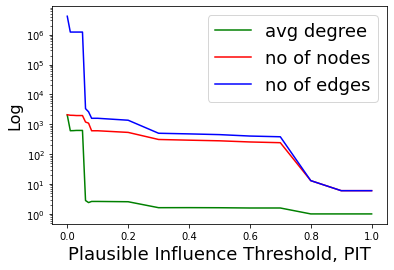

In [75]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

#fig, ax = plt.subplots()
nodes[0] = 2089
fig = plt.figure()
plt.plot(t_list, deg, color='green', label = 'avg degree')
plt.plot(t_list, nodes, color='red', label = 'no of nodes')
plt.plot(t_list, edges, color='blue', label = 'no of edges')
plt.legend(loc = 'upper right', fontsize=18)
plt.yscale("log")
plt.xlabel("Plausible Influence Threshold, PIT", fontsize=18)
plt.ylabel("Log", fontsize=16)
plt.show()
fig.savefig('pis_threshold.png')

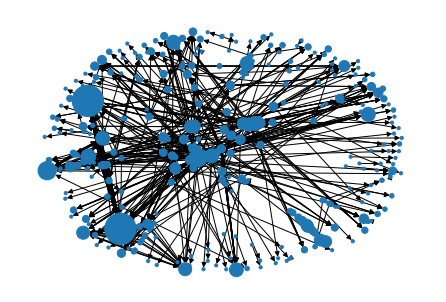

In [76]:
pig = create_pig(0.25)
d = pig.degree()

nodelist = []
node_size = []
for key, val in pig.degree():
    nodelist.append(key)
    node_size.append(val * 10)

nx.draw(pig, nodelist=nodelist, node_size=node_size)
#d

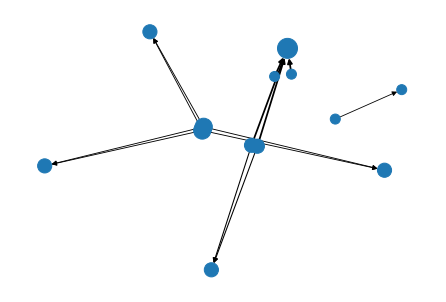

In [77]:
pig = create_pig(0.8)
d = pig.degree()

nodelist = []
node_size = []
for key, val in pig.degree():
    nodelist.append(key)
    node_size.append(val * 100)
weights = nx.get_edge_attributes(pig, 'weight').values()

nx.draw(pig, nodelist=nodelist, node_size=node_size, width=list(weights))